## Circumplanetary Disk - Create a Simple Mock Model

In [2]:
import numpy as np 


In [3]:
# Hill's radius for HD 169142 b CPD:
from astropy.constants import M_sun, L_sun, R_sun, au, pc, G, M_jup, R_jup

# Convert constants to cgs units
au = au.cgs.value     # Astronomical Unit       [cm]
pc = pc.cgs.value     # Parsec                  [cm]
M_sun = M_sun.cgs.value  # Solar mass              [g]
T_sun = 3000      # Solar temperature       [K]
L_sun = L_sun.cgs.value  # Solar luminosity        [erg/s]
R_sun = R_sun.cgs.value  # Solar radius            [cm]
M_jup = M_jup.cgs.value  # Jupiter mass            [g]
R_jup = R_jup.cgs.value  # Jupiter radius          [cm]   


def disk_hill_radius(a, m, M):
    "a: semi-major axis, m: mass of the planet, M: mass of the star"
    Hill = a * (m / (3 * M))**(1/3)
    CPD_r_out = (0.3 * Hill).to('au')
    #err_Hill
    return CPD_r_out


#HD168142b_r_out = disk_hill_radius(37.2*au, 3*M_jup, 1.65 * M_sun)
#print(HD168142b_r_out)

phi_manual = np.arctan(2/37.2)
print(phi_manual)

print(R_jup)
print(f'Ten jupiter radii: {1*R_jup/au} au')

0.053711729303232585
7149200000.0
Ten jupiter radii: 0.0004778945025452157 au


In [3]:
# put the grid refined function here

def grid_refine_mid_plane(theta_orig, nlev, nspan):
    theta = theta_orig.copy()
    rev = theta[0] > theta[1]
    for ilev in range(nlev):
        #theta_new = 0.5 * (theta[nspan-1:-1] + theta[nspan:])  #for last few indices-> small z, refine midplane
        theta_new = 0.5 * (theta[1:nspan+1] + theta[:nspan])   # #refine disk surface
        theta_ref = np.hstack((theta, theta_new))
        theta_ref.sort()
        theta = theta_ref
        if rev:
            theta = theta[::-1]
    return theta


nlev_thetain = 4 
nspan_thetain= 3 

phi_max=0.053711729303232585 radians
shape of rr: (150, 92, 116)
shape of r_masked: (920,)
shape of mask: (150, 92, 116)
shape of rr: (150, 92, 116)
shape of r_masked: (920,)
shape of mask: (150, 92, 116)
pp min: 0.027082695289567183, pp max: 6.25610261189002
Indices of True values in mask_phi: (array([  0,   0,   0, ..., 149, 149, 149], shape=(27600,)), array([ 0,  0,  1, ..., 90, 91, 91], shape=(27600,)), array([  0, 115,   0, ..., 115,   0, 115], shape=(27600,)))
Indices of True values in mask_r: (array([58, 58, 58, ..., 62, 62, 62], shape=(53360,)), array([ 0,  0,  0, ..., 91, 91, 91], shape=(53360,)), array([  0,   1,   2, ..., 113, 114, 115], shape=(53360,)))
Total number of True values in mask_r: 53360
Total number of data points in rr: 1600800
Total number of True values in mask_phi: 27600
Total number of data points in pp: 1600800


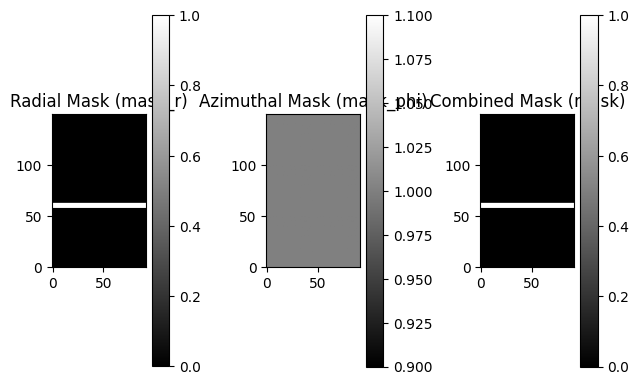

In [ ]:
import numpy as np
# Reference files from radmc3d-2.0/examples/run_ppdisk_simple_1/problem_setup.py

# Make some plots in between to visualize the grid and density distribution

# Import some astronomical constants
from astropy.constants import M_sun, L_sun, R_sun, au, pc, G, M_jup, R_jup
from astropy.units import K, g, cm


# Convert constants to cgs units
au = au.cgs.value     # Astronomical Unit       [cm]
pc = pc.cgs.value     # Parsec                  [cm]
M_sun = M_sun.cgs.value  # Solar mass              [g]
T_sun = 3000      # Solar temperature       [K]
L_sun = L_sun.cgs.value  # Solar luminosity        [erg/s]
R_sun = R_sun.cgs.value  # Solar radius            [cm]
M_jup = M_jup.cgs.value  # Jupiter mass            [g]
R_jup = R_jup.cgs.value  # Jupiter radius          [cm]   

    # Grid : defines layout of space

nr       = 150 
ntheta   = 80
nphi     = 100


r_in      = 0.2*au   # 3 times Jupyter radius
r_out     = 90*au 

theta_up  = np.pi*0.5 - 0.7e0  
        # Coordinate array

#r_i       = np.logspace(np.log10(r_in),np.log10(r_out),nr+1)
r_i       = np.linspace(r_in,r_out,nr+1)  #+1 because it is not counting cell centers, but the walls
#r_i       = grid_refine_inner_edge(r_i,nlev_rin,nspan_rin)

theta_i   = np.linspace(theta_up,0.5e0*np.pi,ntheta+1)  # theta goes to pi/2 lets z starts from zero 

theta_i   = grid_refine_mid_plane(theta_i, nlev_thetain, nspan_thetain)


#print(np.pi/2.e0-theta_i)
phi_i     = np.linspace(0.e0,np.pi*2.e0,nphi+1)



        # Cell center position array

r_c       = 0.5 * ( r_i[:-1] + r_i[1:] )
theta_c   = 0.5 * ( theta_i[:-1] + theta_i[1:] )
phi_c     = 0.5 * ( phi_i[:-1] + phi_i[1:] )

ntheta       = len(theta_c)  
nphi         = len(phi_c)


        # Make the grid
            # takes in the center positions of the cells and returns a 3D matrix of the grid
            # indexing='ij' means that the first two indices of the 3D matrix are the r and theta coordinates
qq       = np.meshgrid(r_c,theta_c,phi_c,indexing='ij')
            # Extract the coordinates (r,theta, z) from the 3D matrix
rr       = qq[0]  # final r coor defined by cell center
tt       = qq[1] # final theta coor defined by cell center, just for defining zr
pp       = qq[2]
zr       = np.pi/2.e0 - qq[1]    # z = pi/2 - theta, essentially frame rotated by 90 degrees, and z is from 0 to 0.7 radians


    # Density: dust values (for each species) for each cell in the grid
                                                                                                                                                             
        # number of dust species
ndustspec = 2


sigmag0  = 1e3               # Sigma gas at 1 AU
sigmad0  = sigmag0 * 0.01    # Sigma dust at 1 AU , 10g/cm^2
fracbig  = 0.99              # Fraction of dust that is the big grain dust
plsig    = -1.0e0            # Powerlaw of the surface density
hr0      = 0.05              # H_p/r at 1 AU
plh      = 0.1               # Powerlaw of flaring
hrbigsett= 0.02              # The big grains are settled a bit more than the small grains
        # dust density function

sigmad   = sigmad0 * (rr/au)**plsig
sigmadsm = sigmad*(1.-fracbig)
sigmadbg = sigmad*fracbig
hhrsm    = hr0 * (rr/au)**plh
hhrbg    = hrbigsett * (rr/au)**plh
hhsm     = hhrsm * rr
hhbg     = hhrbg * rr
rhodsm   = ( sigmadsm / (np.sqrt(2.e0*np.pi)*hhsm) ) * np.exp(-(zr**2/hhrsm**2)/2.e0)
rhodbg   = ( sigmadbg / (np.sqrt(2.e0*np.pi)*hhbg) ) * np.exp(-(zr**2/hhrbg**2)/2.e0)




#CPD parameters
#sigma_g0 =  10**3 #(g/cm**2)   # gas surface density at 1 au
sigmad02 = 2127   #(g/cm**2) #g/cm^2 # dust surface density at 1 au
plsig2 = -1.2# power law index for the dust surface density
plh2  = 1.15 # power law index for the dust scale height
hr02 = 0.1
hrbigsett2 =0.05


# Define the radial range for the CPD
r_min = 36.2 * au  # Inner radius of the CPD region
r_max = 39.2 * au  # Outer radius of the CPD region
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
print(f'phi_max={phi_max} radians')
phi_min = 2*np.pi - phi_max


# Create a mask for the specified range of rr
mask_r = (rr >= r_min) & (rr <= r_max)
mask_phi = (pp >= 0) & (pp <= phi_max) | (pp >= phi_min) & (pp <= 2*np.pi) #or operator

mask = mask_r & mask_phi  # only mask ones that satisfy both

# Extract the masked radial values
r_masked = rr[mask]

print(f'shape of rr: {rr.shape}')
print(f'shape of r_masked: {r_masked.shape}')
print(f'shape of mask: {mask.shape}')
pp_masked = pp[mask]


print(f'shape of rr: {rr.shape}')
print(f'shape of r_masked: {r_masked.shape}')
print(f'shape of mask: {mask.shape}')

# Define the midpoint of the CPD region
r_mid = 37.2*au # Midpoint of the radial range

# Shift the radial array by the midpoint and take the positive values

# law of cosine:   for any triangle with sides of lengths (a), (b), and (c), and an angle (\gamma) opposite the side (c):
# c^2 = a^2 + b^2 - 2ab \cos(\gamma) 
r_shifted = np.sqrt(r_masked**2 + r_mid**2 - 2*r_masked*r_mid*np.cos(pp_masked))
# r_masked^2 + r_mid^2 - 2*r_masked*r_mid*cos(pp_masked) = r_shifted^2
# r_masked^2 + r_mid^2 - 2*r_masked*r_mid*cos(pp_masked) - r_shifted^2 = 0


# Update the density model within the specified range
# Apply the shifted and positive radial values
# ongoing discussion about shape (Sun etal 2024)
sigmad[mask] += sigmad02 * (r_shifted /au) ** plsig2
sigmadsm[mask] = sigmad[mask] * (1. - fracbig)
sigmadbg[mask] = sigmad[mask] * fracbig
hhrsm[mask] += hr02 * (r_shifted / au) ** plh2
hhrbg[mask] += hrbigsett2 * (r_shifted / au) ** plh2
hhsm[mask] = hhrsm[mask] * r_shifted
hhbg[mask] = hhrbg[mask] * r_shifted
rhodsm[mask] = (sigmadsm[mask] / (np.sqrt(2.e0 * np.pi) * hhsm[mask])) * np.exp(-(zr[mask] ** 2 / hhrsm[mask] ** 2) / 2.e0)
rhodbg[mask] = (sigmadbg[mask] / (np.sqrt(2.e0 * np.pi) * hhbg[mask])) * np.exp(-(zr[mask] ** 2 / hhrbg[mask] ** 2) / 2.e0)



#mask_phi = (pp >= 0) & (pp <= np.pi)
print(f'pp min: {np.min(pp)}, pp max: {np.max(pp)}')
indices_mask_phi = np.where(mask_phi)
print(f'Indices of True values in mask_phi: {indices_mask_phi}')
indices_mask_r = np.where(mask_r)
print(f'Indices of True values in mask_r: {indices_mask_r}')
mask = mask_r & mask_phi
print(f'Total number of True values in mask_r: {np.sum(mask_r)}')
print(f'Total number of data points in rr: {rr.size}')
#Print the fraction of data points in the phi mask true compare to total data points of the phi grid, it should be small
print(f'Total number of True values in mask_phi: {np.sum(mask_phi)}')
print(f'Total number of data points in pp: {pp.size}')


import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(mask_r[:, :, 0], cmap='gray', origin='lower')
plt.title('Radial Mask (mask_r)')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(mask_phi[:, :, 0], cmap='gray', origin='lower')
plt.title('Azimuthal Mask (mask_phi)')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(mask[:, :, 0], cmap='gray', origin='lower')
plt.title('Combined Mask (mask)')
plt.colorbar()

plt.tight_layout()
plt.show()




In [15]:
print(r_masked/au)

[35.222 35.222 35.222 ... 38.814 38.814 38.814]


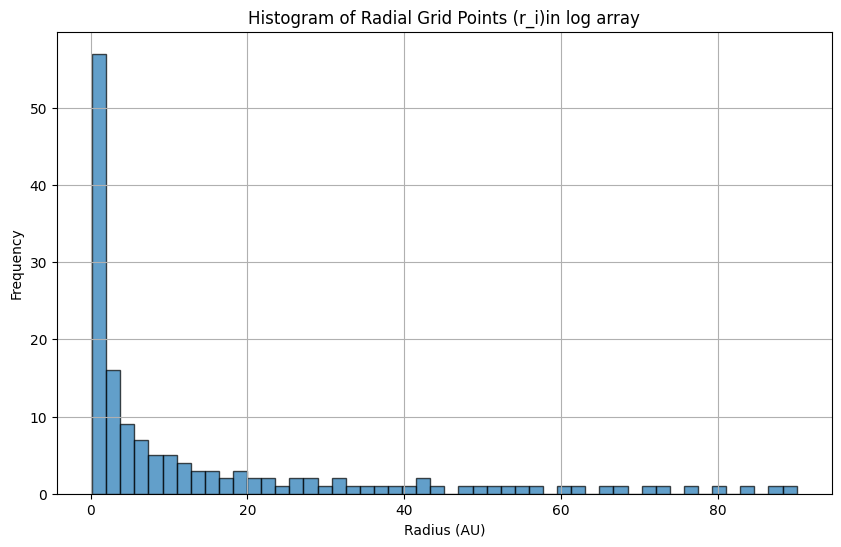

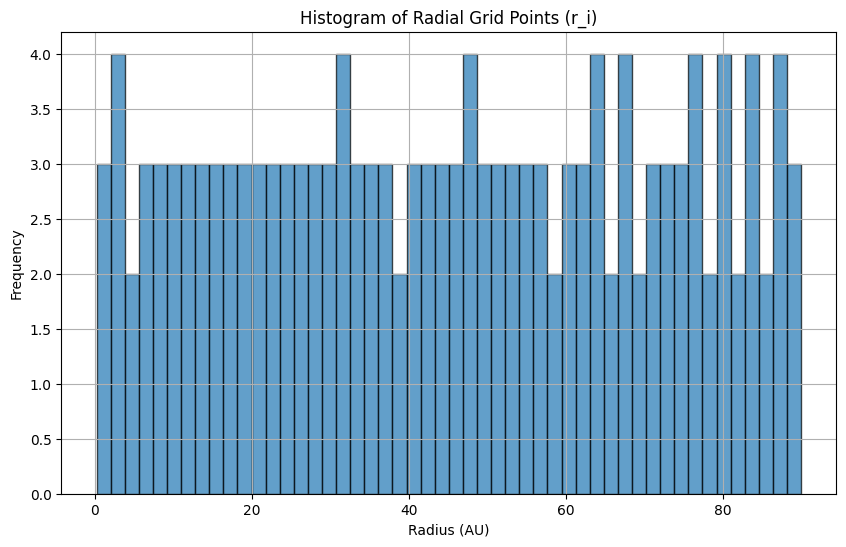

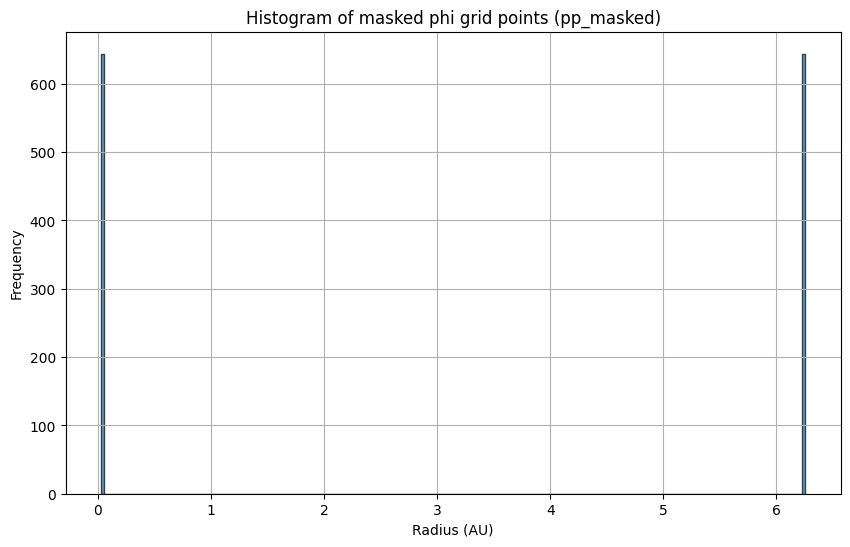

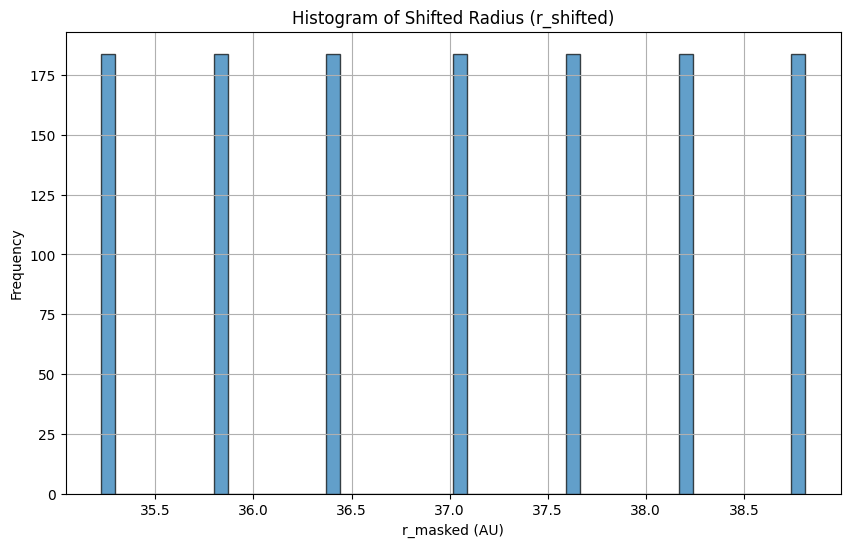

In [16]:

# Plot the histogram for r_i array
r_i_log       = np.logspace(np.log10(r_in),np.log10(r_out),nr+1)
plt.figure(figsize=(10, 6))
plt.hist(r_i_log/au, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Radius (AU)')
plt.ylabel('Frequency')
plt.title('Histogram of Radial Grid Points (r_i)in log array')
plt.grid(True)
plt.show()



# Plot the histogram for r_i
plt.figure(figsize=(10, 6))
plt.hist(r_i/au, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Radius (AU)')
plt.ylabel('Frequency')
plt.title('Histogram of Radial Grid Points (r_i)')
plt.grid(True)
plt.show()


# Plot the histogram for pp_masked (should be two extreme)
plt.figure(figsize=(10, 6))
plt.hist(pp_masked, bins=200, edgecolor='k', alpha=0.7)
plt.xlabel('Radius (AU)')
plt.ylabel('Frequency')
plt.title('Histogram of masked phi grid points (pp_masked)')
plt.grid(True)
plt.show()


# Plot the histogram for r_masked
plt.figure(figsize=(10, 6))
plt.hist(r_masked/au, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('r_masked (AU)')
plt.ylabel('Frequency')
plt.title('Histogram of Shifted Radius (r_shifted)')
plt.grid(True)
plt.show()
# So they are in units of cm, why the values are the same though




In [17]:
print(np.shape(rr))
print(np.shape(r_masked))
print(np.shape(sigmadsm))
print(np.shape(rhodbg))

(150, 92, 116)
(1288,)
(150, 92, 116)
(150, 92, 116)


The shape of rr_slice is (150, 116)
The shape of pp_slice is (150, 116)
The shape of sigmad_slice is (150, 116)
The shape of x is (116, 150)
The shape of y is (116, 150)


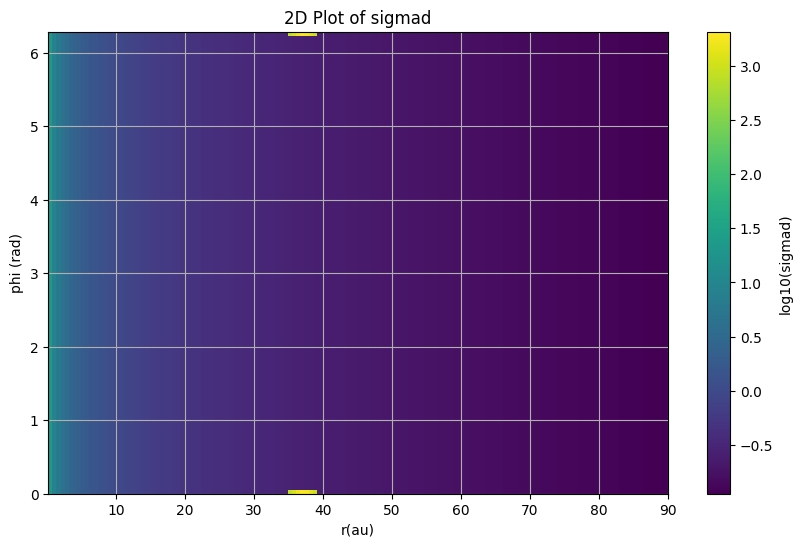

C:\Users\LHEM\AppData\Local\Temp\ipykernel_30236\304931481.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, np.log(sigmad_slice.T), shading='auto', cmap='viridis')


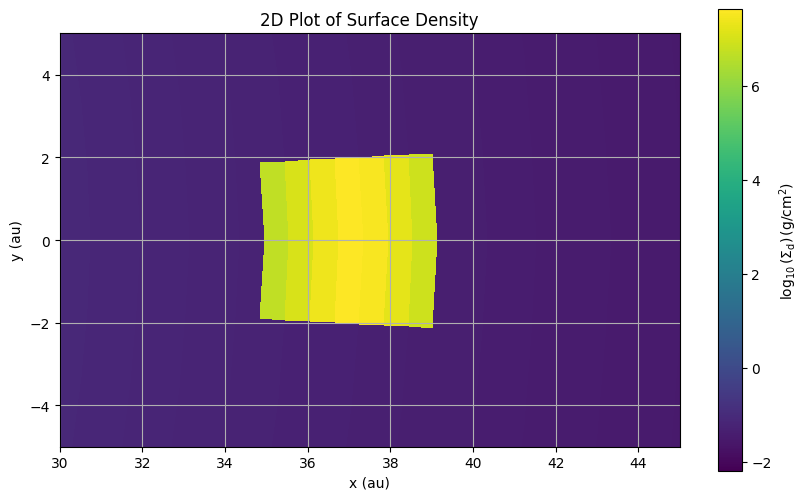

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rr, pp, and sigmad are 3D arrays
# Select the 2D slice where theta is zero (assuming theta is the third dimension)
rr_slice = rr[:, 0, :]
pp_slice = pp[:, 0, :]
sigmad_slice = sigmad[:, 0, :]

print(f'The shape of rr_slice is {np.shape(rr_slice)}')
print(f'The shape of pp_slice is {np.shape(pp_slice)}')
print(f'The shape of sigmad_slice is {np.shape(sigmad_slice)}')


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(rr_slice[:, 0], pp_slice[0, :])

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')


# Create a 2D plot of sigmad vs x, y
plt.figure(figsize=(10, 6))
plt.pcolormesh(rr_slice/au, pp_slice, np.log10(sigmad_slice), shading='auto', cmap='viridis')
plt.colorbar(label='log10(sigmad)')
plt.xlabel('r(au)')
plt.ylabel('phi (rad)')
plt.title('2D Plot of sigmad')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, np.log(sigmad_slice.T), shading='auto', cmap='viridis')
plt.colorbar(label=r'$\log_{10}(\Sigma_{\mathrm{d}}) \, (\mathrm{g/cm^2})$')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.xlim(30,45)
plt.ylim(-5,5)
plt.title('2D Plot of Surface Density')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

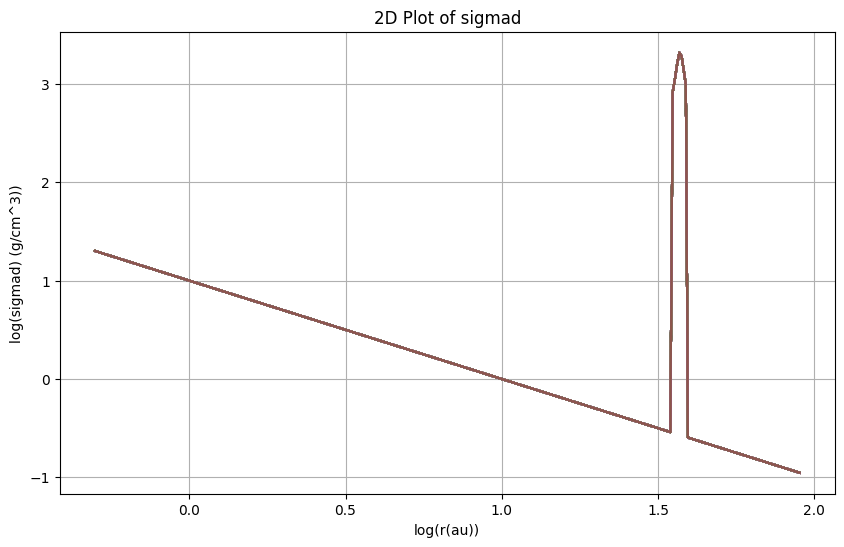

In [19]:
rr_slice = rr[:, 0, :]
pp_slice = pp[:, 0, :]
sigmad_slice = sigmad[:, 0, :]


plt.figure(figsize=(10, 6))
plt.plot(np.log10(rr_slice/au), np.log10(sigmad_slice[:,0]))
plt.xlabel('log(r(au))')
plt.ylabel('log(sigmad) (g/cm^3))')
plt.title('2D Plot of sigmad')
plt.grid(True)
plt.show()

In [11]:
print(np.shape(mask))

(150, 92, 116)


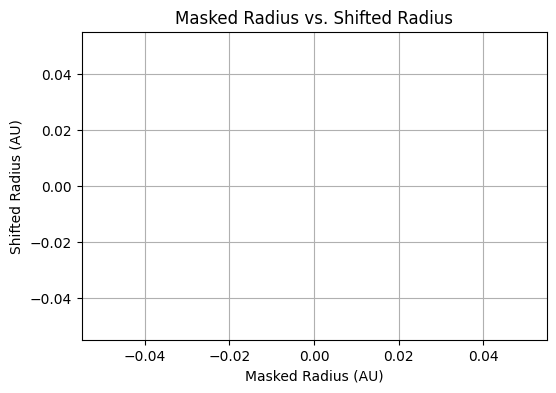

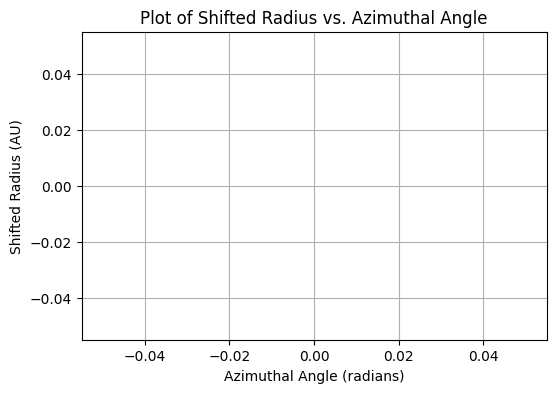

In [12]:
# Focused on the masked region
# What do I want to test -> masked_r and shifted_r 
# what should masked_r and shifted_r look like

r_masked_au = r_masked / au
r_shifted_au = r_shifted / au

# Plot r_masked versus r_shifted
plt.figure(figsize=(6, 4))
plt.plot(r_masked_au, r_shifted_au, 'x')
plt.xlabel('Masked Radius (AU)')
plt.ylabel('Shifted Radius (AU)')
plt.title('Masked Radius vs. Shifted Radius')
plt.grid(True)
plt.show()

# r_shifted vs pp_masked
plt.figure(figsize=(6, 4))
plt.plot(pp_masked,r_shifted_au, 'o')
#plt.xlim(0, np.pi)
plt.ylabel('Shifted Radius (AU)')
plt.xlabel('Azimuthal Angle (radians)')
plt.title('Plot of Shifted Radius vs. Azimuthal Angle')
plt.grid(True)
plt.show()


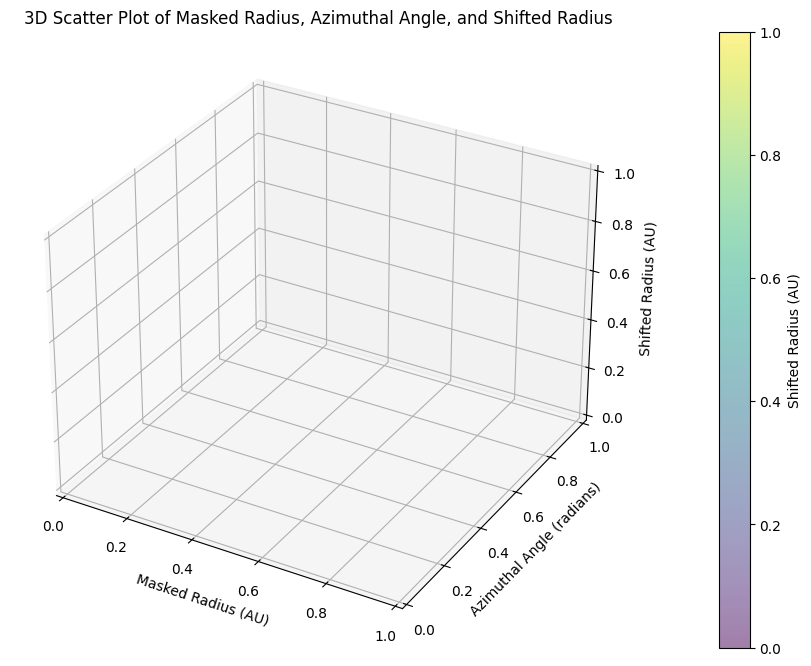

All angles at r = 37.2 au has shifted radius of 1 -> largest dust density  as smallest r
max Angles at 2 or 4 radians can only be reached at r = 37.2 the shifted radius is 1
Range of shifted r: 


In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming r_masked, pp_masked, and r_shifted are already calculated as per your previous code

# Convert r_masked and r_shifted to AU for easier interpretation
r_masked_au = r_masked / au
r_shifted_au = r_shifted / au

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
sc = ax.scatter(r_masked_au, pp_masked, r_shifted_au, c=r_shifted_au, cmap='viridis', s=20, alpha=0.5)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Shifted Radius (AU)')

# Set labels
ax.set_xlabel('Masked Radius (AU)')
ax.set_ylabel('Azimuthal Angle (radians)')
ax.set_zlabel('Shifted Radius (AU)')
ax.set_title('3D Scatter Plot of Masked Radius, Azimuthal Angle, and Shifted Radius')

# Show plot
plt.show()


print(f'All angles at r = 37.2 au has shifted radius of 1 -> largest dust density  as smallest r')
print(f'max Angles at 2 or 4 radians can only be reached at r = 37.2 the shifted radius is 1')
print(f'Range of shifted r: ')